In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from numpy.random import randn,randint
from scipy.spatial import distance

In [33]:
def m(list_value):
    m_value = list_value[0]
    index = 0
    for i in range(1,len(list_value)):
        if(m_value>list_value[i]):
            index = i
            m_value = list_value[i]
    return index

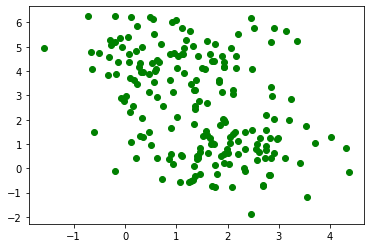

In [47]:
# Data preaparation and visualization
X,Y = make_blobs(n_samples=200,n_features = 2, centers = 2,shuffle = True,random_state=0)
plt.scatter(
    X[:,0] , X[:,1],
    marker="o",
    color = "green")
        
plt.show()
 

In [35]:
K = 2 #no of clusters
m=200 #no of samples
c=[] #list to hold the cluster number of a point and has m values
new_u = [] #list to hold position of cluster and has K values  
cost_fnc = [] # cost function has m values

In [36]:
# random initialization of K=3 cluster points
def rand_init(m,K,new_u):
    rand_x = randint(0,m,K)
    for i in rand_x:
        l =(X[i][0],X[i][1])
        new_u.append(l)
    return new_u

#cost function
def cost_func(c,new_u,X):
    dist=0
    for i in range(len(c)):
        dist+= distance.euclidean(X[i],new_u[c[i]])**2
    mean = dist/m
    return mean            
#k means algorithm
def k_means_algo(m,K,new_u,c,X):
    for i in range(m):
        list_min = []
        for j in range(K):
            d = distance.euclidean(new_u[j],X[i])
            list_min.append(d)
        m_index = 0
        for w in range(1,len(list_min)):
            if(list_min[m_index]>list_min[w]):
                m_index = w
        c.append(m_index)
    for i in range(K):
        x_d=[]
        y_d=[]
        for j in range(len(c)):
            if(c[j]==i):
                x_d.append(distance.euclidean(new_u[i][0],X[i][0]))
                y_d.append(distance.euclidean(new_u[i][1],X[i][1]))               
        x_d = np.array(x_d)
        y_d = np.array(y_d)
        x_d = np.mean(x_d)
        y_d = np.mean(y_d)
        new_u[i] = [x_d,y_d]
    error = cost_func(c,new_u,X)
    return c,new_u,error


In [37]:
n_iteration = 1200
J=[]
for i in range(n_iteration):
    new_u=[]
    c=[]
    new_u = rand_init(m,K,new_u)
    c,new_u,error = k_means_algo(m,K,new_u,c,X)
    J.append([error,c,new_u])
list_opt=J[0]
min_v = J[0][0]
for i in range(1,n_iteration):
    if(J[i][0]<min_v):
        min_v = J[i][0]
        list_opt = J[i]
print(list_opt)

[2.093048599085527, [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], [[2.190724090627618, 0.8496127008344827], [0.5355048424626297, 4.490341286625908]]]


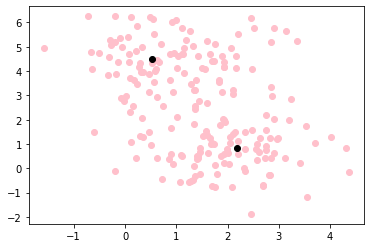

In [46]:
plt.scatter(
    X[:,0] , X[:,1],
    marker="o",
    color = "pink")
plt.scatter(
    list_opt[2][0][0] , list_opt[2][0][1],
    marker="o",
    color = "black")
plt.scatter(
    list_opt[2][1][0] , list_opt[2][1][1],
    marker="o",
    color = "black")

The black points represent the cluster points which clealy divide the data points into two clusters